# Estimator lab exercise solution

### 1. Create a circuit

In [1]:
!pip install qiskit-algorithms


[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


### Invoking Estimator.run within a session

In [2]:
from qiskit.quantum_info import Operator, Pauli

# Create Pauli objects
pauli2 = Pauli('ZII')
pauli1 = Pauli('IZI')
pauli0 = Pauli('IIZ')

# Sum the matrices
choc_matrix = pauli2.to_matrix() + pauli1.to_matrix() + pauli0.to_matrix()

# Create a new Operator from the sum
choc_op = Operator(choc_matrix)

print("choc_op:")
print(choc_op)


choc_op:
Operator([[ 3.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -3.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibmq_qasm_simulator")

In [4]:
import numpy as np
from qiskit_algorithms.optimizers import SPSA
from qiskit.circuit.library import EfficientSU2

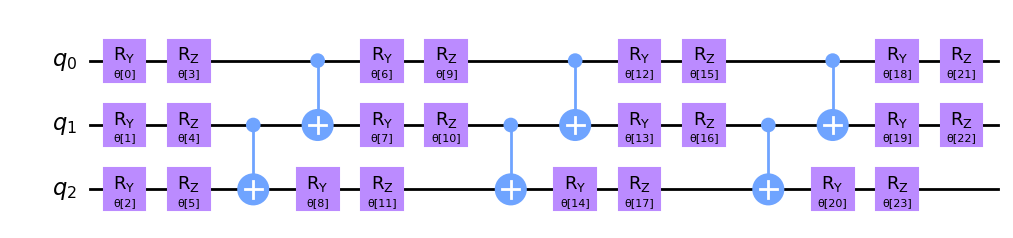

In [5]:
from qiskit_ibm_runtime import Session, Estimator

ansatz = EfficientSU2(3)
ansatz.decompose().draw('mpl')

In [6]:
from qiskit_ibm_runtime import Options

options = Options()
options.resilience_level = 1
options.execution.shots = 1024

In [7]:
with Session(backend=backend, max_time="1h"):
    estimator = Estimator(options=options)
    
    callback = lambda nfev, params, fval, step, acc: print(f'Evaluation {nfev}: {fval}')
    optimizer = SPSA(callback=callback, maxiter=800)

    cost_func = lambda params: estimator.run(ansatz, choc_op, parameter_values=params).result().values[0]
    result = optimizer.minimize(cost_func, x0=np.zeros(ansatz.num_parameters))

Evaluation 3: 2.771484375
Evaluation 6: 1.16796875
Evaluation 9: -0.052734375
Evaluation 12: 0.39453125
Evaluation 15: 1.1015625
Evaluation 18: -0.173828125
Evaluation 21: 1.01953125
Evaluation 24: -0.12890625
Evaluation 27: 0.314453125
Evaluation 30: 0.38671875
Evaluation 33: 0.31640625
Evaluation 36: -0.32421875
Evaluation 39: 0.328125
Evaluation 42: -0.619140625
Evaluation 45: 0.296875
Evaluation 48: -0.12109375
Evaluation 51: 0.474609375
Evaluation 54: -0.47265625
Evaluation 57: 0.28125
Evaluation 60: 0.2265625
Evaluation 63: 0.126953125
Evaluation 66: 0.1640625
Evaluation 69: 0.16796875
Evaluation 72: 0.93359375
Evaluation 75: 0.771484375
Evaluation 78: 0.796875
Evaluation 81: 0.396484375
Evaluation 84: 0.37890625
Evaluation 87: -0.408203125
Evaluation 90: 0.37109375
Evaluation 93: 0.171875
Evaluation 96: -0.50390625
Evaluation 99: -0.51171875
Evaluation 102: -1.0390625
Evaluation 105: 0.697265625
Evaluation 108: 0.3125
Evaluation 111: 0.400390625
Evaluation 114: 0.373046875
Evalu

In [8]:
print(result)

{   'fun': -2.826171875,
    'jac': None,
    'nfev': 2400,
    'nit': 800,
    'njev': None,
    'x': array([ -9.56017985,  -4.64220701, -12.26150775,  19.64097635,
        -9.15193801,  12.96786745,   6.08171526,  -2.65529274,
        -8.15214255,  -7.13778493,  -6.10021308,   3.84878623,
        -9.43258673,   4.65917276,  -5.38573869,  20.74893756,
        -5.92553392,  16.21789649,  21.9244313 ,  -2.63901941,
         0.9301882 ,  13.16576782,   1.70788509,  -4.54412247])}
